In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing 

In [2]:
X = np.array([[ 7,  8,  0],
       [ 9,  3,  6],
       [ 1, 10,  4]])
X

array([[ 7,  8,  0],
       [ 9,  3,  6],
       [ 1, 10,  4]])

In [3]:
X_pinv = np.linalg.pinv(X)
X_pinv

array([[ 0.08333333,  0.05555556, -0.08333333],
       [ 0.05208333, -0.04861111,  0.07291667],
       [-0.15104167,  0.10763889,  0.08854167]])

In [4]:
X_normal = np.linalg.inv((X.T@X)) @ X.T
X_normal

array([[ 0.08333333,  0.05555556, -0.08333333],
       [ 0.05208333, -0.04861111,  0.07291667],
       [-0.15104167,  0.10763889,  0.08854167]])

In [5]:
# between 0.0000000000000001 and 0.0000000000000002 ~= 0 meaning equal
np.linalg.norm(X_pinv - X_normal)

1.4338515319353585e-16

**Implementing Linear Regression**

In [32]:
class Linear_Regression:
    def fit(self, data,label, intercept= False):
        if not intercept:
            ones = np.ones(len(data)).reshape(len(data), 1) # column of ones 
            data = np.concatenate((ones, data), axis = 1)
        self.label = label
        self.data = data
        data_pinv = np.linalg.pinv(self.data)
        weight = data_pinv @ self.label
        self.weight = weight
        self.label_hat = (data @ self.weight)
        self.Loss = .5 * np.sum((self.label - self.label_hat)**2)
    def predict(self, data_test, intercept = True):
        self.label_test = data_test @ self.weight    

In [33]:
housing = fetch_california_housing()
data = housing['data']
label = housing['target']

In [37]:
LR = Linear_Regression()
LR.fit(data, label)
# equal result with the in_practice one
np.linalg.norm(LR.label - LR.label_hat)

104.02877080332294

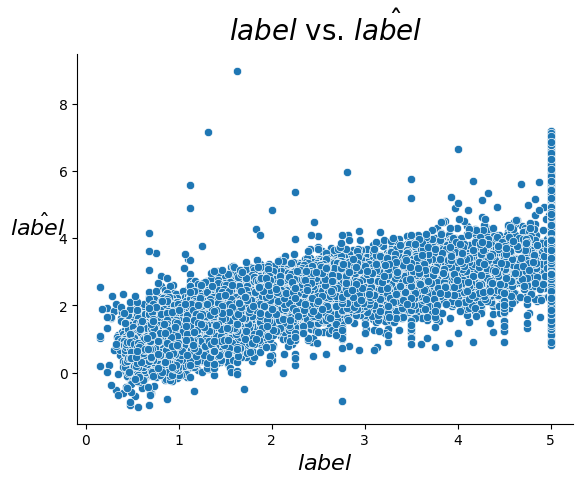

In [35]:
fig, ax = plt.subplots()
sns.scatterplot(x = LR.label, y = LR.label_hat)
ax.set_xlabel(r'$label$', size = 16)
ax.set_ylabel(r'$\hat{label}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$label$ vs. $\hat{label}$', size = 20, pad = 10)
sns.despine()